# Introduction to Numpy/PyTorch

A few links:
- https://github.com/nicknytko/cse-pytorch-workshop
- PyTorch tutorials: https://pytorch.org/tutorials/
- PyTorch manual: https://pytorch.org/docs/stable/index.html
- PyTorch paper: https://openreview.net/forum?id=BJJsrmfCZ
- Calculus on computational graphs: http://colah.github.io/posts/2015-08-Backprop/
- Einstein summation in PyTorch: https://rockt.github.io/2018/04/30/einsum

Pytorch
- 🔥 NumPy-like -- how is it different?
- 🔜 Computes derivatives using a (dynamic) computation graph -- what is this?
- ⏭️ Library of neural nets -- how will we use these?
- ⏭️ Library of optimizers -- why is this important?
- ⏭️ Ability to use GPUs -- where/how?

# Let's get started!

In [1]:
__author__ = 'Dario Rodriguez'

Install necessary packages

In [2]:
!pip install torch numpy matplotlib

In [3]:
import torch
import numpy as np
import random, datetime
import matplotlib.pyplot as plt
%matplotlib inline

# Numpy

## Scalar vs. Matrix vs. Tensor

<img src="data/02_tensors.jpeg" alt="Drawing" style="width: 500px;"/>

Credits: [https://www.i2tutorials.com/what-do-you-mean-by-tensor-and-explain-about-tensor-datatype-and-ranks/](https://www.i2tutorials.com/what-do-you-mean-by-tensor-and-explain-about-tensor-datatype-and-ranks/)

* Numpy arrays and PyTorch tensors are all "tensors".

* Each tensor has a set of dimensions:
  * *Scalars* are 0-dimensional tensors.
  * *Vectors* are 1-dimensional tensors.
  * *Matrices* are 2-dimensional tensors.
  * We can have n-dimensional tensors the same way.

## 1. Array Attributes

Let's say `arr` is a numpy array. These are some key attributes:

* **Shape**: `arr.shape` denotes the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension.


* **Size**: `arr.size` denotes the total number of elements of the array.


* **Data-type**: `arr.dtype` denotes the type of the elements in the array. Some examples are `int32`, `int64`, `float32`, `float64`, `bool` and so on.


* **Number of Dimensions**: `arr.ndim` denotes the number of dimensions in the array.


In other words, we have
```
arr.size == np.prod(arr.shape)
arr.ndim == len(arr.shape)
```

In [4]:
a = np.array([[1, 2, 3],
              [5, 6, 7]])

In [5]:
# The number of dimensions in `a`
a.ndim

2

In [6]:
# Let's check out the shape of `a`
a.shape

(2, 3)

In [7]:
# Let's look at what data-type numpy used for storing `a`
a.dtype

dtype('int64')

**Question**: Why did numpy assign a data type of `int64` as opposed to `float64`?

All elements defined in the array are integers

In [8]:
# Let's select the first entry in `a`
b = a[0, 0]
b.shape

()

In [9]:
b.size

1

**Question**: What does a shape of `()` even mean?

This is just a number (not iterable), numpy silently creates this sort of "empty" array but its size is 1

In [10]:
# Let's create
c = np.array([1])
c.shape

(1,)

**Question**: Is `c` different from `b`?
  * If yes, aren't they both scalars?
  * If no, then why do they have different shapes?
  
  Note the difference below

In [11]:
print(type(b))
print(type(c))

<class 'numpy.int64'>
<class 'numpy.ndarray'>


In [12]:
a = np.array(1)
b = np.array([1])
c = np.array([[1]])
d = np.array([[[1]]])

print(f'a.shape ==> {a.shape}')
print(f'b.shape ==> {b.shape}')
print(f'c.shape ==> {c.shape}')
print(f'd.shape ==> {d.shape}')

a.shape ==> ()
b.shape ==> (1,)
c.shape ==> (1, 1)
d.shape ==> (1, 1, 1)


## 2. Creating Numpy Arrays

### Creating an all zeros array

In [13]:
z = np.zeros((2,3,4), dtype=np.float32)
z

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]], dtype=float32)

In [14]:
z.shape

(2, 3, 4)

### Creating an all ones array

In [15]:
o = np.ones((2,3,4), dtype=np.float32)
o

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]], dtype=float32)

### Creating a range of values

In [16]:
r = np.arange(8)
r

array([0, 1, 2, 3, 4, 5, 6, 7])

### Creating a linear spacing of values

In [17]:
l = np.linspace(0, 100, 6)
l

array([  0.,  20.,  40.,  60.,  80., 100.])

### Creating an identity matrix

In [18]:
i = np.eye(3)
i

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Creating a diagonal matrix

In [19]:
d = np.diag([1,3,4])
d

array([[1, 0, 0],
       [0, 3, 0],
       [0, 0, 4]])

### Creating an array filled with a value

In [20]:
# Creating a full array
f = np.full((2,3,4), 9, dtype=np.float32)
f

array([[[9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.]],

       [[9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.]]], dtype=float32)

### Concatenating arrays

In [21]:
a = np.zeros((1, 2, 3))
b = np.ones((1, 2, 3))

c = np.concatenate([a, b], axis=0)
d = np.concatenate([a, b], axis=1)
e = np.concatenate([a, b, b], axis=2)

print(f'a.shape == {a.shape}')
print(f'b.shape == {b.shape}')
print(f'np.concatenate([a, b], axis=0) --> shape == {c.shape}')
print(f'np.concatenate([a, b], axis=1) --> shape == {d.shape}')
print(f'np.concatenate([a, b], axis=2) --> shape == {e.shape}')

a.shape == (1, 2, 3)
b.shape == (1, 2, 3)
np.concatenate([a, b], axis=0) --> shape == (2, 2, 3)
np.concatenate([a, b], axis=1) --> shape == (1, 4, 3)
np.concatenate([a, b], axis=2) --> shape == (1, 2, 9)


### Creating randomized arrays

In [22]:
# Sampling from the normal distribution
norm = np.random.randn(2, 3, 4)
norm

array([[[-1.67196478, -0.10973241, -0.99592624, -1.19513715],
        [-0.2773381 ,  0.1010146 ,  0.50779017, -1.71375745],
        [ 1.36359499, -0.78718037,  0.75429242, -0.93764506]],

       [[ 2.38888387, -0.00818561,  1.06610026,  1.28842611],
        [ 2.24353559, -0.23257885, -0.74854144, -0.90212726],
        [ 2.29226487,  0.36384208,  0.74343059, -1.10101295]]])

In [23]:
# Sampling from the uniform distribution over [0, 1]
unif = np.random.rand(2, 3, 4)
unif

array([[[0.27002282, 0.18361909, 0.83483564, 0.09715875],
        [0.95889799, 0.13127583, 0.94631236, 0.83947439],
        [0.40243366, 0.80200943, 0.50903283, 0.62725332]],

       [[0.85365738, 0.68744708, 0.78096343, 0.58836007],
        [0.92356953, 0.84887647, 0.1770604 , 0.16070338],
        [0.86554257, 0.58163321, 0.49154395, 0.69594197]]])

You can find a list of distributions to sample from at https://numpy.org/doc/stable/reference/random/legacy.html

## 3. Array Operations

* The underlying data for all arrays is stored sequentially in the memory.
* However, we can *view* the same data differently.
* Reshaping does just that!

<img src="data/03_reshape.webp" alt="Drawing" style="width: 500px;"/>

Credits: https://geekflare.com/numpy-reshape-arrays-in-python/

In [24]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Note that transposition is not the same as reshaping

In [25]:
b = a.reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [26]:
c = a.reshape(3, 2, 2)
c

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

All three variables share the same underlying data

In [27]:
print(f'The memory location of a.data: {hex(a.__array_interface__["data"][0])}')
print(f'The memory location of b.data: {hex(b.__array_interface__["data"][0])}')
print(f'The memory location of c.data: {hex(c.__array_interface__["data"][0])}')

The memory location of a.data: 0x6d23e90
The memory location of b.data: 0x6d23e90
The memory location of c.data: 0x6d23e90


## Reshaping is not the same as transposing!

In [28]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [29]:
b.reshape(4, 3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [30]:
b.transpose()

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

### Slicing an array

In [31]:
a = np.linspace(0, 100, 11)
a

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [32]:
a[3:7]

array([30., 40., 50., 60.])

In [33]:
# You can do this in multiple dimensions
b = np.arange(30).reshape(5, 6)
b

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [34]:
b[0:4:2, 0:6:2]

array([[ 0,  2,  4],
       [12, 14, 16]])

## Broadcasting

It's just "virtual stretching" across dummy dimensions of size one:

<img src="data/08_bcast.png" alt="Drawing" style="width: 500px;"/>

Credits: https://numpy.org/doc/stable/user/basics.broadcasting.html

In [35]:
a = np.array([1, 2, 3])
b = np.array(2)
c = a * b
c

array([2, 4, 6])

<img src="data/09_bcast.png" alt="Drawing" style="width: 500px;"/>

In [36]:
a = np.array([[1, 3, 4, 5],
              [2, 7, 3, 1]])

b = np.array([[0, 2, 0, 2]])

c = a + b
c

array([[1, 5, 4, 7],
       [2, 9, 3, 3]])

### Some elementwise functions

In [37]:
# Raising to the power of 2
a ** 2

array([[ 1,  9, 16, 25],
       [ 4, 49,  9,  1]])

In [38]:
# Exponentiating
np.exp(a)

array([[   2.71828183,   20.08553692,   54.59815003,  148.4131591 ],
       [   7.3890561 , 1096.63315843,   20.08553692,    2.71828183]])

In [39]:
# Logarithms
np.log(a)

array([[0.        , 1.09861229, 1.38629436, 1.60943791],
       [0.69314718, 1.94591015, 1.09861229, 0.        ]])

In [40]:
# trigonometry functions
np.sin(a)

array([[ 0.84147098,  0.14112001, -0.7568025 , -0.95892427],
       [ 0.90929743,  0.6569866 ,  0.14112001,  0.84147098]])

In [41]:
# Matrix multiplications
b = a @ a.transpose()
b

array([[51, 40],
       [40, 63]])

In [42]:
# Matrix inversion
np.linalg.inv(b)

array([[ 0.03905766, -0.02479851],
       [-0.02479851,  0.0316181 ]])

In [43]:
# Singular Value Decomposition
u, s, v = np.linalg.svd(a)
print(u)
print(s)
print(v)

[[-0.65255634 -0.75774021]
 [-0.75774021  0.65255634]]
[9.87154987 4.06847676]
[[-0.21962476 -0.73563428 -0.49469901 -0.40728375]
 [ 0.1345399   0.56401299 -0.2638068  -0.77084002]
 [-0.57536055 -0.08140025  0.70755025 -0.40212794]
 [-0.77628875  0.36620425 -0.43017613  0.2796761 ]]


### Reduction Fucntions

First, you need to learn how the `axis` argument works!

<img src="data/05_axis.png" alt="Drawing" style="width: 500px;"/>

Credit: https://predictivehacks.com/tips-about-numpy-arrays/

One of the reduction functions is `np.sum`. You can apply it across any dimensions.

<table><tr>
<td> <img src="data/06_sum0.png" width="600"/> </td>
<td> <img src="data/07_sum1.png" width="420"/>  </td>
</tr></table>

Credits: https://www.sharpsightlabs.com/blog/numpy-sum/

Errata: The sum values are incorrect in the left figure

In [44]:
a = np.array([[1, 3, 4, 5],
              [2, 7, 3, 1]])

Another reduction function is the mean

In [45]:
np.mean(a, axis=0)

array([1.5, 5. , 3.5, 3. ])

Another reduction function is the standard deviation

In [46]:
np.std(a, axis=1)

array([1.47901995, 2.27760839])

Another reduction function is the standard deviation

In [47]:
np.std(a, axis=1)

array([1.47901995, 2.27760839])

You can also take the min and max

In [48]:
a.min(axis=0)

array([1, 3, 3, 1])

You can also figure out where the min and max are placed!

In [49]:
a.argmax(axis=1)

array([3, 1])

### Case Study

Images are arrays of intensity values.

<img src="data/04_parrot.jpg" alt="Drawing" style="width: 500px;"/>

In [50]:
img_arr = plt.imread('data/04_parrot.jpg')

# The image dimensions
img_arr.shape

(700, 900, 3)

**Question**: What do the shape dimensions mean?
* The first dimension corresponds to the height of the image (700 pixels).
* The second dimension corresponds to the width of the image (900 pixels).
* The third dimension corresponds to the color channels (red, green, and blue).

In [51]:
height, widht, channels = img_arr.shape

In [52]:
img_arr.dtype

dtype('uint8')

In [53]:
img_arr.min(), img_arr.max()

(0, 255)

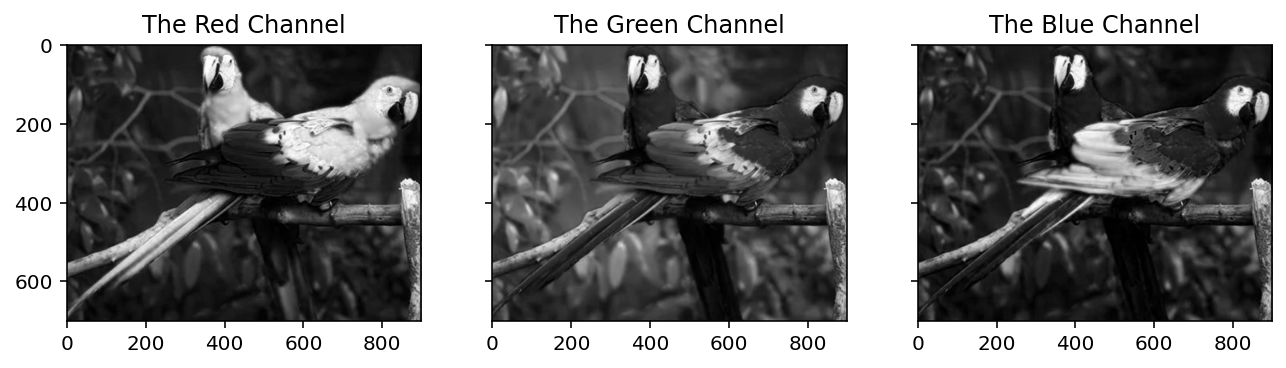

In [54]:
# The red channel
red_channel = img_arr[:, :, 0]
assert red_channel.shape == (700, 900)

# The green channel
green_channel = img_arr[:, :, 1]
assert green_channel.shape == (700, 900)

# The blue channel
blue_channel = img_arr[:, :, 2]
assert blue_channel.shape == (700, 900)


fig, axes = plt.subplots(1, 3, dpi=144, figsize=(3.6*3, 2.8), sharex=True, sharey=True)

ax = axes[0]
ax.imshow(red_channel, cmap='gray')
ax.set_title('The Red Channel')

ax = axes[1]
ax.imshow(green_channel, cmap='gray')
ax.set_title('The Green Channel')

ax = axes[2]
ax.imshow(blue_channel, cmap='gray')
ax.set_title('The Blue Channel');

Let's remove the green channel for fun!

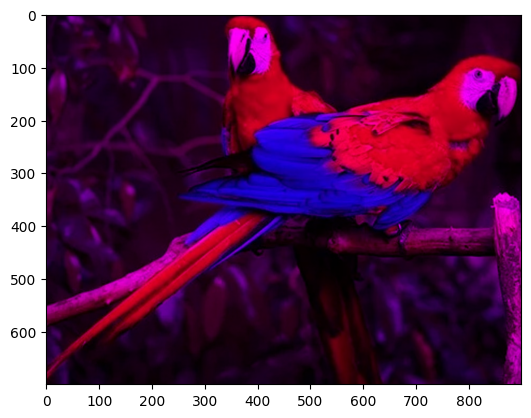

In [55]:
img_arr2 = img_arr.copy()
img_arr2[:, :, 1] = 0

plt.imshow(img_arr2);

The linear luminance of a pixel can be computed as

$$ Y = 0.2126 R + 0.7152 G + 0.0722 B $$

<font color=red>Challenge</font>: Take this colored image, and turn it into a gray-scaled image. Do this in four different way.

**Approach 1**: Take a manual summation

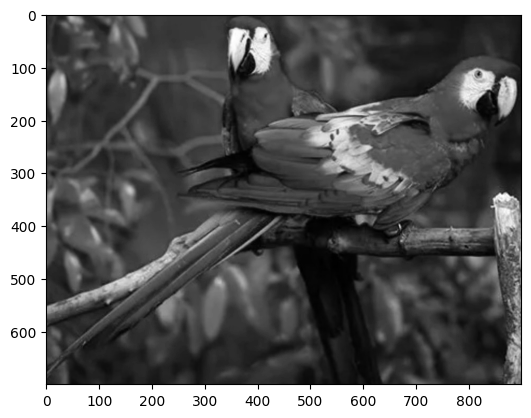

In [56]:
gray1 = 0.2126 * red_channel + 0.7152 * green_channel + 0.0722 * blue_channel
plt.imshow(gray1, cmap='gray');

**Approach 2**: Broadcast-multiply by weights, and then take a summation!

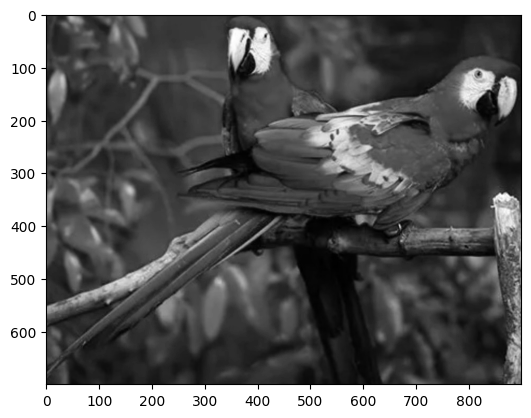

In [57]:
weights = np.array([0.2126, 0.7152, 0.0722])
broad_arr = np.zeros((img_arr.shape[0], img_arr.shape[1], 3))
broad_arr[:] = weights
gray2 = np.sum(img_arr * broad_arr, axis=2)
plt.imshow(gray2, cmap='gray');

**Approach 3**: Do it with matrix multiplication!

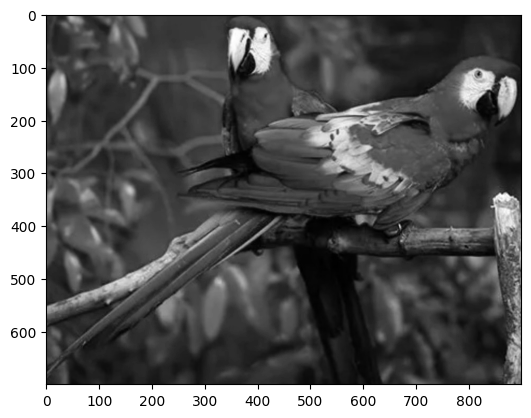

In [58]:
weights = np.array([0.2126, 0.7152, 0.0722])
# gray3 = np.dot(img_arr[:,:,:], weights)
gray3 = img_arr @ weights
plt.imshow(gray3, cmap='gray');

**Approach 4**: Do it with einstein sums!

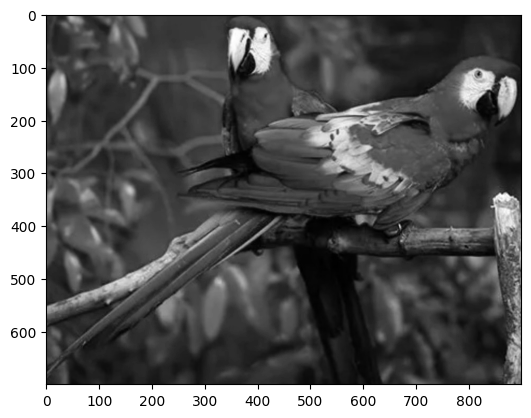

In [59]:
weights = np.array([0.2126, 0.7152, 0.0722])
gray4 = np.einsum('ijk,k->ij', img_arr, weights)
plt.imshow(gray4, cmap='gray');

<font color=red>Challenge</font>: Replace each pixel with the average of its neighbors. Do not use convolutions.

Text(0.5, 1.0, 'Averaged-pixel image')

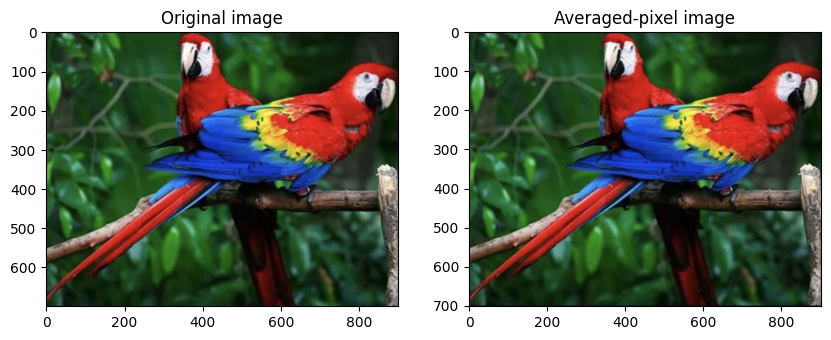

In [60]:
h, w, ch = img_arr.shape
n_ghost_cells = 1
img_arr_path = np.zeros((h + 2 * n_ghost_cells, w + 2 * n_ghost_cells, ch)) # Add zero paddinng to the image
img_arr_path[1:-1, 1:-1] = img_arr  # Embed image into previous array

kernel = np.ones((3, 3), dtype=float) / 8.  # Kernel 
kernel[1, 1] = 0. 
img_avg = np.einsum('ijk,xy->ijk', img_arr_path, kernel).astype(int)  # Recall that (R,G,B) is an integer tuple/list

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_arr)
ax[0].set_title('Original image')

ax[1].imshow(img_avg)
ax[1].set_title('Averaged-pixel image')


#### Verification for pixel in (10,10), RBG value should be the average of pixels located in (9,9), (9,10),(10,9), (10,11), (11,9), (11,10), (11,11)

In [62]:
# Slicing
cell = 25  # You can change this number to whatever you want

sub_img = img_arr[cell-1:cell+2,cell-1:cell+2]
kernel = np.ones((3,3)) / 8
kernel[1,1] = 0.

# Printing out results 
print(np.sum(sub_img[:,:,0] * kernel))
print(img_avg[cell+1,cell+1,0])

print(np.sum(sub_img[:,:,1] * kernel))
print(img_avg[cell+1,cell+1,1])

print(np.sum(sub_img[:,:,2] * kernel))
print(img_avg[cell+1,cell+1,2])


# Testing
np.testing.assert_allclose(img_avg[cell+1,cell+1,0], int(np.sum(sub_img[:,:,0] * kernel)), atol=1, rtol=1)
np.testing.assert_allclose(img_avg[cell+1,cell+1,1], int(np.sum(sub_img[:,:,1] * kernel)), atol=1, rtol=1)
np.testing.assert_allclose(img_avg[cell+1,cell+1,2], int(np.sum(sub_img[:,:,2] * kernel)), atol=1, rtol=1)


16.25
16
50.0
49
18.0
18


<font color=red>Challenge</font>: This is a 700 by 900 pixel image:

* Divide it into 7 by 9 grids.
* In each grid, find the pixel with maximum luminance.
* Print the **colored max-luminance** image.
* You can only use array operations (i.e., no loops/lists/etc.)

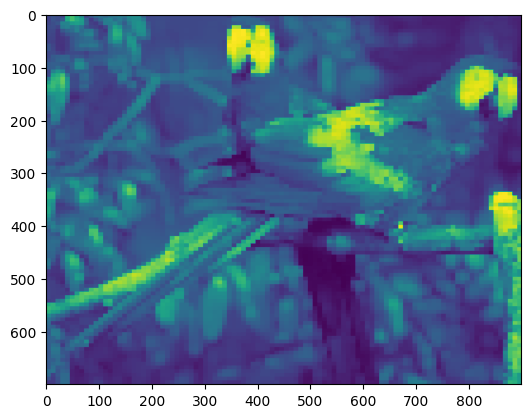

In [63]:
weights = np.array([0.2126, 0.7152, 0.0722])
n_img_row, n_img_col = img_arr.shape[0] // 100, img_arr.shape[1] // 100
img_rshp = img_arr.reshape(100, n_img_row, 100, n_img_col, 3)
max_lum_matrix = np.max(img_rshp @ weights, axis=(1,3)).astype(int)
casted_max_lum_matrix = np.broadcast_to(max_lum_matrix[:, np.newaxis, :, np.newaxis], (100, 7, 100, 9))
max_lum_img = casted_max_lum_matrix.reshape(700, 900)
plt.imshow(max_lum_img)  # Does the outcome needs to be 700x900 as well? Not sure about this

<font color=red>Challenge</font>: Let's say you have an $N\times D$ data matrix and a bunch of labels $y$. You have $C$ classes in your data.
    
Find the data mean within each class. You can only use numpy operations.

In [64]:
N = 100
D = 8
C = 10

np.random.seed(12345)
X = np.random.randn(N, D)
assert X.shape == (N, D)
Y = np.random.randint(0, C, N)
assert Y.shape == (N,)

In [65]:
truth_matrix = (Y.reshape(-1,1) == np.arange(C)).T  #Broadcast comparisson for each element on Y labels
dum_1 = np.sum(truth_matrix, axis=1)
# print(np.sum(dum_1))
avg_classes = np.sum(truth_matrix@X, axis=1) / (np.sum(truth_matrix, axis=1) * D)
avg_classes_dict = {str(i): avg_classes[i] for i in range(avg_classes.shape[0])}
print(avg_classes_dict)

{'0': -0.12098984807286989, '1': -0.013195624517833031, '2': 0.1584489477511196, '3': 0.0055492985741647845, '4': 0.0514890768793303, '5': -0.06635226808734461, '6': 0.04109000617445863, '7': 0.03442996586086707, '8': -0.10008002666819434, '9': -0.08233073670170413}


# PyTorch <-> NumPy

PyTorch executes immediately ("eager") versus delayed or lazy execution in TensorFlow.

Tensors are a generalization of a matrix and a vector.  See Einstein notation above!

PyTorch is very picky about datatypes, and defaults to single precision (NumPy defaults to double).

In [66]:
x = torch.tensor([[1.0,2.0,3.0],[4,5,6]])
print(x.dtype)
print(x)

torch.float32
tensor([[1., 2., 3.],
        [4., 5., 6.]])


***
<font color=red>Challenge</font>: force `x` to be `float64`
***

In [67]:
x_64 = x.to(torch.float64)
print(x_64.dtype)

torch.float64


Let's look at a few numpy conversions and numpy-like operations:

In [68]:
x = np.random.rand(3)

y = torch.tensor(x)

z = torch.from_numpy(x)

In [69]:
x[1] = 88
print(x)
print(y)
print(z)

[ 0.20289255 88.          0.71354503]
tensor([0.2029, 0.1815, 0.7135], dtype=torch.float64)
tensor([ 0.2029, 88.0000,  0.7135], dtype=torch.float64)


Notice that `from_numpy()` will create a tensor view of the *same* mameory.  From the docs:
```
Modifications to the tensor will be reflected in the :attr:`ndarray` and vice versa.
```

Operations...

In [70]:
A = torch.tensor([[1.0, 2], [3, 4]])
v = torch.tensor([1.2, 3.4])

A @ v

tensor([ 8.0000, 17.2000])

***
<font color=red>Challenge</font>: write the matvec operation `A @ v` in `.einsum()`
***

In [71]:
matvec = torch.einsum('ik,kj->ij', A, v.reshape(-1, 1))
print(matvec)

tensor([[ 8.0000],
        [17.2000]])
